# Exploratory Data Analysis & Intro

## Goal

1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

## Questions to Answer
1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)
   
I'll be focusing on US Data Analyst roles, but you can adapt to any of the following:

## Exploratory Data Analysis for all Data Roles

### Roles to Explore

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Huawei\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


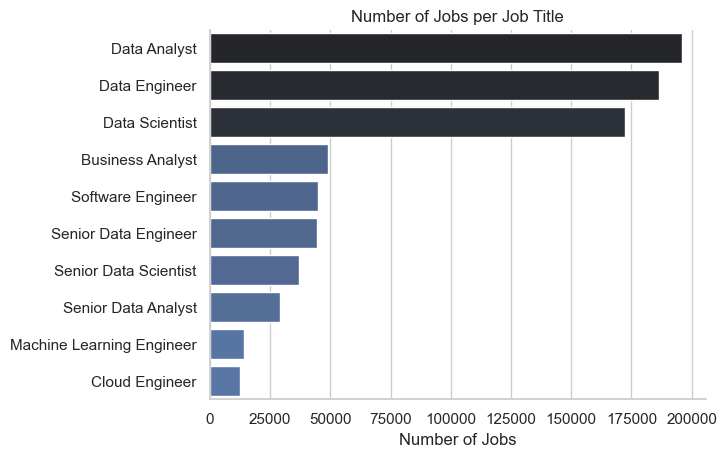

In [13]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='whitegrid')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## Counties to Explore

C:\Users\Huawei\AppData\Local\Temp\ipykernel_2720\1324388862.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_plot.values, y=df_plot.index, palette='Blues_r', edgecolor="black")


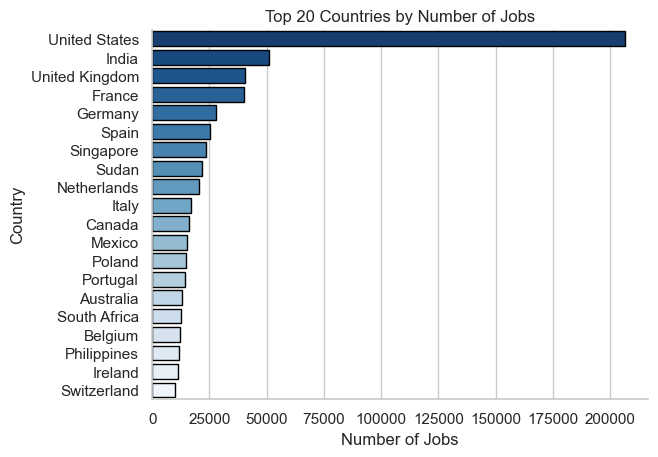

In [12]:
df_plot = df['job_country'].value_counts().head(20)

sns.set_theme(style='whitegrid')
sns.barplot(x=df_plot.values, y=df_plot.index, palette='Blues_r', edgecolor="black")
sns.despine()

plt.title('Top 20 Countries by Number of Jobs')
plt.xlabel('Number of Jobs')
plt.ylabel('Country')

plt.show()

## Companies to Explore

C:\Users\Huawei\AppData\Local\Temp\ipykernel_2720\2804715463.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_plot.values, y=df_plot.index, palette='coolwarm_r', edgecolor="black")


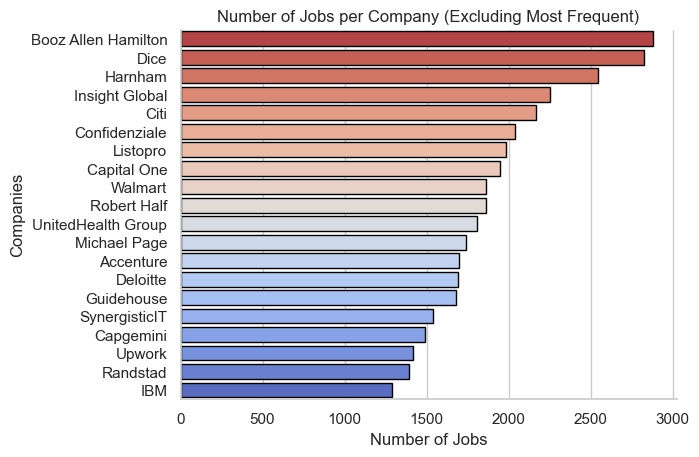

In [15]:
df_plot = df['company_name'].value_counts().iloc[1:21]

sns.set_theme(style='whitegrid')
sns.barplot(x=df_plot.values, y=df_plot.index, palette='coolwarm_r', edgecolor="black")
sns.despine()

plt.title('Number of Jobs per Company (Excluding Most Frequent)')
plt.xlabel('Number of Jobs')
plt.ylabel('Companies')

plt.show()


## Job opportuities

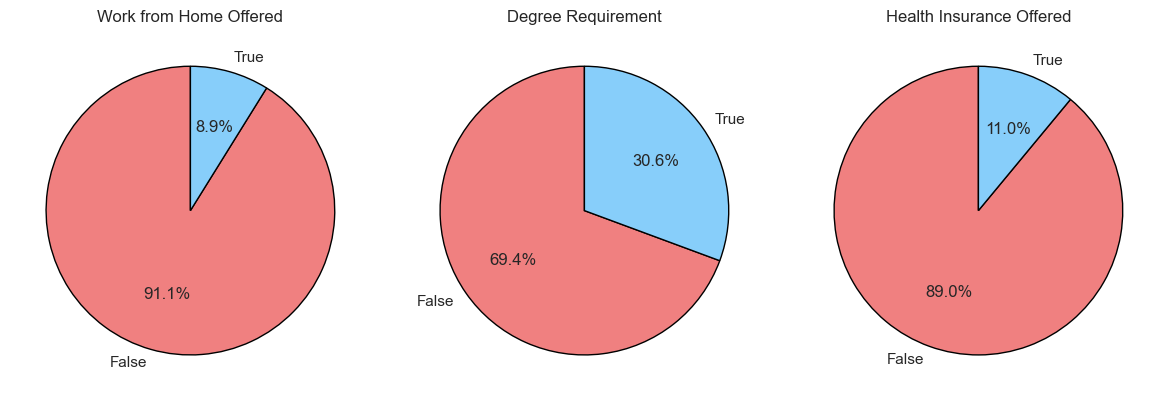

In [16]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for i, (column, title) in enumerate(dict_column.items()):
    values = df[column].value_counts(normalize=True) * 100
    ax[i].pie(
        values, labels=['False', 'True'], autopct='%1.1f%%', startangle=90, 
        colors=['lightcoral', 'lightskyblue'], wedgeprops={'edgecolor': 'black'}
    )
    ax[i].set_title(title)

plt.tight_layout()
plt.show()


## Exploratory Data Analysis for Data Analysts in Germany

In [19]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Filter for Germany Data Analyst roles

In [27]:
df_DA_Germany = df[(df['job_country'] == 'Germany') & (df['job_title_short'] == 'Data Analyst')]

## Locations to Explore:

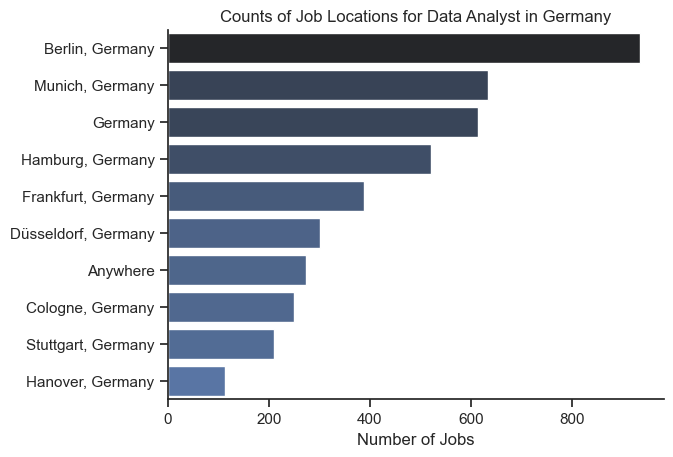

In [28]:
df_plot = df_DA_Germany['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in Germany')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

## Job Opportunities

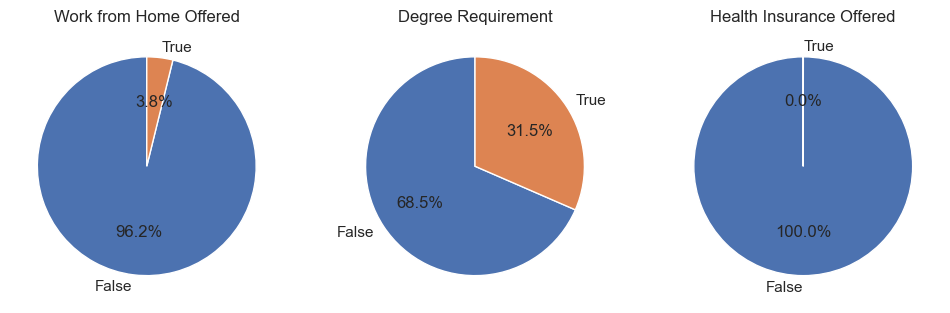

In [29]:
# rewrite the above with a for loop
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_Germany[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

# plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()

## Companies to Explore:

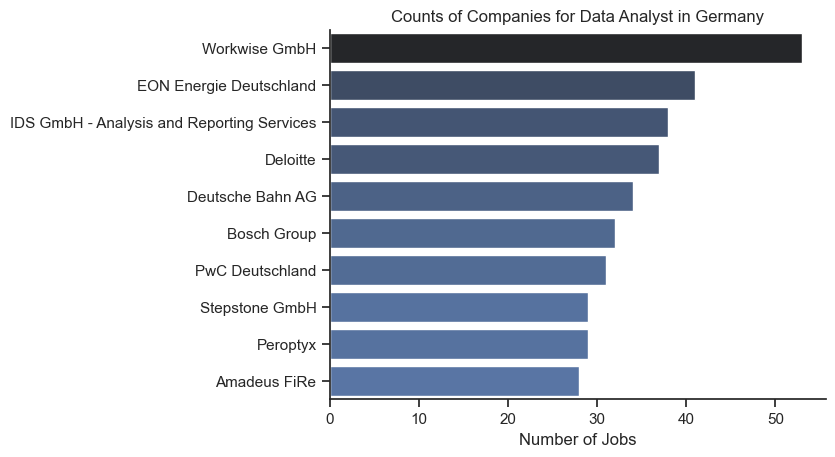

: 

In [ ]:
df_plot = df_DA_Germany['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in Germany')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()